In [4]:
!pip install seaborn

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento das bases

In [23]:
df_boxing_v1 = pd.read_csv('experiments/Boxing-v1/df_results.csv')
df_boxing_v1.shape

(991, 7)

In [24]:
df_boxing_v2 = pd.read_csv('experiments/Boxing-v2/df_results.csv')
df_boxing_v2.shape

(2949, 7)

# Pré-processamento

In [43]:
df_boxing_v1.head()

,REWARD,TRAIN,TIME,LOSS,EXPLORATION_RATE,FPS,LR,MEAN_REWARDS
0,-4.0,2360.0,1.644937e+09,0.000350,0.97740,16,0.0001,-4.000000
1,1.0,4764.0,1.644937e+09,0.000285,0.95336,15,0.0001,-1.500000
2,-5.0,7143.0,1.644937e+09,0.000400,0.92957,15,0.0001,-2.666667
3,-1.0,9514.0,1.644937e+09,0.000468,0.90586,15,0.0001,-2.250000
4,1.0,11898.0,1.644938e+09,0.000496,0.88202,15,0.0001,-1.600000


### Ajustar informações de recompensas em uma escala mais linear

In [25]:
def norm(n):
    0 if n<0 else n
    
def mean_reward(df):
    mean_rewards_boxing = []
    interval=50
    for i in range(df.shape[0]):
        mean_rewards_boxing.append(df.loc[norm(i-interval):i, 'REWARD'].mean())

    df['MEAN_REWARDS'] = mean_rewards_boxing
    return df

In [26]:
df_boxing_v1 = mean_reward(df_boxing_v1)
df_boxing_v2 = mean_reward(df_boxing_v2)

In [27]:
# Tempo gasto para os experimentos.

print('Tempo - Experimento v1 variável: {} / horas'.format( (df_boxing_v1['TIME'].iloc[-1] - df_boxing_v1['TIME'].iloc[0]) / (60*60) ))
print('Tempo - Experimento v2 variável: {} / horas'.format( (df_boxing_v2['TIME'].iloc[-1] - df_boxing_v2['TIME'].iloc[0]) / (60*60) ))

Tempo - Experimento v1 variável: 36.65823232816325 / horas
Tempo - Experimento v2 variável: 95.084112560153 / horas


<AxesSubplot:xlabel='TRAIN', ylabel='MEAN_REWARDS'>

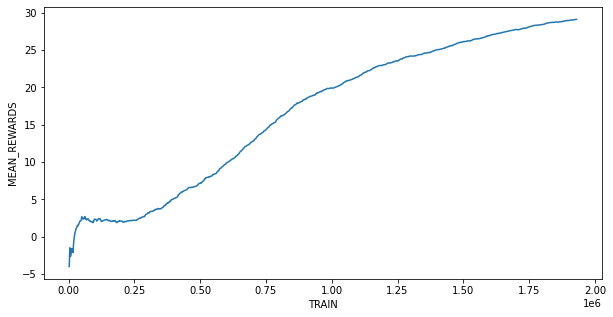

In [41]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_boxing_v1, x='TRAIN', y='MEAN_REWARDS')

<AxesSubplot:xlabel='TRAIN', ylabel='MEAN_REWARDS'>

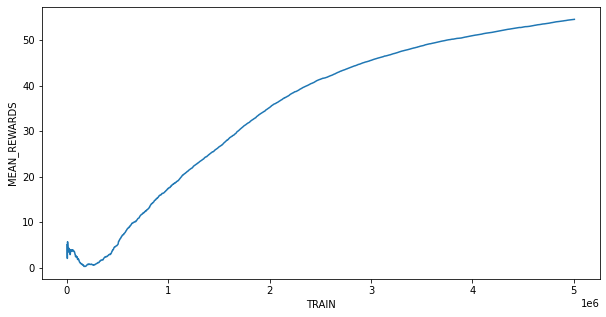

In [42]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_boxing_v2, x='TRAIN', y='MEAN_REWARDS')